# Models of Stock Return

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
company_stock = "data/TSLA.csv"
stocks = pd.read_csv(company_stock, sep=r'\s*,\s*', encoding='ascii', engine='python')

#Cleaning up Data
#replace currency with float values
stocks[stocks.columns[1:]] = stocks[stocks.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
stocks = stocks.iloc[::-1] #reverse dataframe so dates are in ascending order
stocks['Date'] = stocks['Date'].convert_dtypes(convert_string=True)
stocks.index = stocks['Date'] #make date the index

stocks.head()


,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
06/29/2010,06/29/2010,23.89,18751150.0,19.00,25.0000,17.54
06/30/2010,06/30/2010,23.83,17165210.0,25.79,30.4192,23.30
07/01/2010,07/01/2010,21.96,8216789.0,25.00,25.9200,20.27
07/02/2010,07/02/2010,19.20,5135795.0,23.00,23.1000,18.71
07/06/2010,07/06/2010,16.11,6858092.0,20.00,20.0000,15.83


# Distribution of Log Return

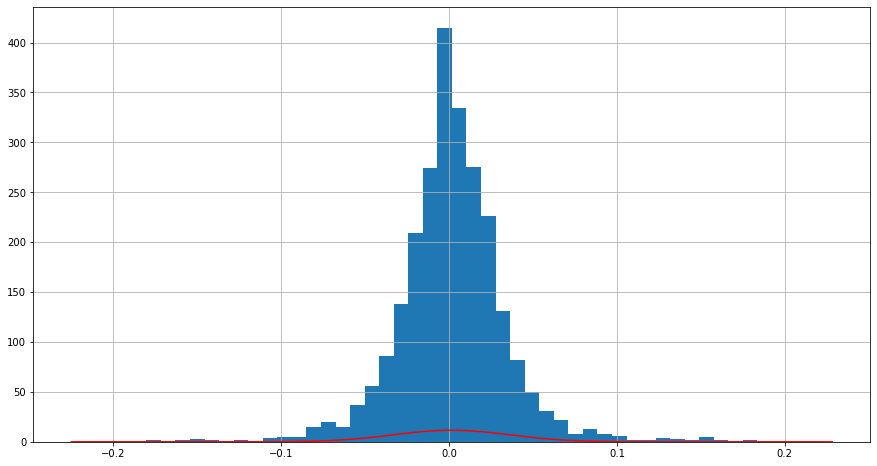

In [3]:
stocks['LogReturn'] = np.log(stocks['Close/Last']).shift(-1) - np.log(stocks['Close/Last'])
mu = stocks['LogReturn'].mean()
sigma = stocks['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(stocks['LogReturn'].min()-0.01, stocks['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

stocks['LogReturn'].hist(bins=50, figsize=(15,8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [4]:
# probability stock price of company will drop in a day
price_drops = [0.05, 0.10]
for drop in price_drops:
    prob_return1 = norm.cdf(-drop, mu, sigma)
    print("Probability stock price will drop over {0}% in a day: {1}%".format(drop*100, prob_return1))

Probability stock price will drop over 5.0% in a day: 0.0670153739807429%
Probability stock price will drop over 10.0% in a day: 0.0015698481428454592%


In [5]:
# probability stock price of company will drop in a year
price_drops = [0.10, 0.20, 0.40]
mu220 = 253*mu # 253 is the number of trading days in a year
sigma220 = (253**0.5) * sigma

for drop in price_drops:
    prob_return1 = norm.cdf(-drop, mu220, sigma220)
    print("Probability stock price will drop over {0}% in a year: {1}%".format(drop*100, prob_return1))

Probability stock price will drop over 10.0% in a year: 0.19267969455526102%
Probability stock price will drop over 20.0% in a year: 0.14661671912297358%
Probability stock price will drop over 40.0% in a year: 0.07823610938703689%


# Calculate Value at risk (VaR)

  * VaR is typically used by firms and the regulators in the financial industry to gauge the amount of assess needed to cover possible loss.
  * Example for 5% quantile equal to -0.05%, there's a 5% chance that the daily return is worse than -5%

In [6]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk', VaR)

#Quatile
quantiles = [0.05, 0.25, 0.75, 0.95]
for percent in quantiles:
    print("{0}% quantile: {1}".format(percent*100, norm.ppf(percent, mu, sigma)))


Single day value at risk -0.05503183271022103
5.0% quantile: -0.05503183271022103
25.0% quantile: -0.021693429750477302
75.0% quantile: 0.024652918506924328
95.0% quantile: 0.057991321466668036
